In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("Banknotes1.csv")
df.head()

,variance,skewness,curtosis,entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [2]:
df.groupby('Class').describe()

variance                                                                 \
         count      mean       std     min       25%     50%      75%     max   
Class                                                                           
0        762.0  2.276686  2.019348 -4.2859  0.883345  2.5531  3.88445  6.8248   
1        610.0 -1.868443  1.881183 -7.0421 -3.061450 -1.8061 -0.54177  2.3917   

      skewness            ...  curtosis          entropy                      \
         count      mean  ...       75%      max   count      mean       std   
Class                     ...                                                  
0        762.0  4.256627  ...  2.652925   8.8294   762.0 -1.147640  2.125077   
1        610.0 -0.993576  ...  5.626350  17.9274   610.0 -1.246641  2.070984   

                                                    
          min       25%      50%       75%     max  
Class                                               
0     -8.5482 -2.228250 -0.55238  0.423258  2.4495  
1     -7.5887 -2.458375 -0.66165  0.341790  2.1353  

[2 rows x 32 columns]

In [3]:
df.shape

(1372, 5)

In [4]:
df.isna().sum()

variance    0
skewness    0
curtosis    0
entropy     0
Class       0
dtype: int64

In [5]:
print(f'Number of duplicate entries = {df[df.duplicated()].size}')


Number of duplicate entries = 120


In [6]:
df = df.drop_duplicates(keep='first')
df.shape

(1348, 5)

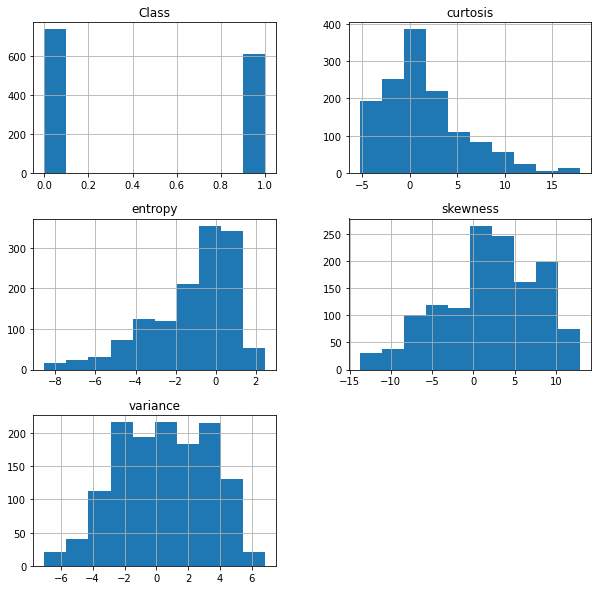

In [35]:
df.hist(figsize = (10,10))
plt.show()

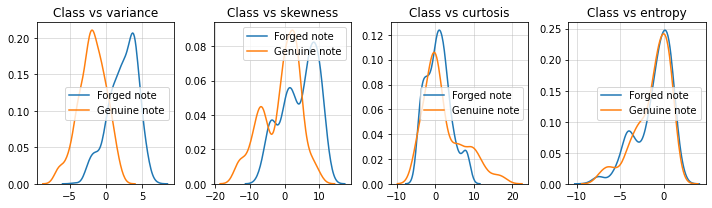

In [8]:
col_names = df.drop('Class', axis = 1).columns.tolist()

plt.figure(figsize = (10,3))
i = 0
for col in col_names:
    plt.subplot(1,4,i+1)
    plt.grid(True, alpha =0.5)
    sns.kdeplot(df[col][df['Class'] ==0], label = 'Forged note')
    sns.kdeplot(df[col][df['Class'] ==1], label = 'Genuine note')
    plt.title('Class vs ' + col)
    plt.tight_layout()
    i+=1
plt.show()


In [9]:
df.groupby('Class').describe()

variance                                                                 \
         count      mean       std     min      25%     50%       75%     max   
Class                                                                           
0        738.0  2.358629  1.989764 -4.2859  1.00405  2.6314  3.911625  6.8248   
1        610.0 -1.868443  1.881183 -7.0421 -3.06145 -1.8061 -0.541770  2.3917   

      skewness            ... curtosis          entropy                      \
         count      mean  ...      75%      max   count      mean       std   
Class                     ...                                                 
0        738.0  4.308220  ...  2.64780   8.8294   738.0 -1.104299  2.097322   
1        610.0 -0.993576  ...  5.62635  17.9274   610.0 -1.246641  2.070984   

                                                   
          min       25%      50%      75%     max  
Class                                              
0     -8.5482 -2.209500 -0.51682  0.45203  2.4495  
1     -7.5887 -2.458375 -0.66165  0.34179  2.1353  

[2 rows x 32 columns]

In [10]:
target=df.Class
inputs=df.drop('Class',axis='columns')

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.5)

In [12]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB(priors=[0.5, 0.5])

In [13]:
model.fit(X_train,y_train)

GaussianNB(priors=[0.5, 0.5])

In [14]:
model.score(X_test,y_test)

0.8635014836795252

In [15]:
X_test[:10]

,variance,skewness,curtosis,entropy
1221,-1.8356,-6.75620,5.058500,-0.550440
645,2.9233,6.04640,-0.111680,-0.586650
1106,-0.1269,-1.15050,-0.951380,0.578430
283,0.3223,-0.89808,8.088300,0.692220
48,3.9102,6.06500,-2.453400,-0.682340
1119,-1.4375,-1.86240,4.026000,0.551270
793,-2.2860,-5.44840,5.803900,0.882310
1097,-2.5919,-1.05530,3.894900,0.777570
569,1.8238,-6.77480,8.387300,-0.541390
187,1.8314,6.36720,-0.036278,0.049554


In [16]:
y_test[:10]

1221    1
645     0
1106    1
283     0
48      0
1119    1
793     1
1097    1
569     0
187     0
Name: Class, dtype: int64

In [17]:
model.predict(X_test[:10])

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

In [18]:
model.predict_proba(X_test[:10])

array([[0.01523269, 0.98476731],
       [0.98785687, 0.01214313],
       [0.396164  , 0.603836  ],
       [0.16638608, 0.83361392],
       [0.99559189, 0.00440811],
       [0.08492834, 0.91507166],
       [0.01136561, 0.98863439],
       [0.0336304 , 0.9663696 ],
       [0.20243148, 0.79756852],
       [0.96107768, 0.03892232]])

In [19]:
from sklearn.model_selection import cross_val_score
cross_val_score(GaussianNB(),X_train, y_train, cv=5)

array([0.80740741, 0.85925926, 0.84444444, 0.84444444, 0.85820896])

In [20]:
import numpy as np
predicted= model.predict(X_test)
print(np.mean(predicted==y_test))

0.8635014836795252


In [21]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predicted))

[[335  46]
 [ 46 247]]


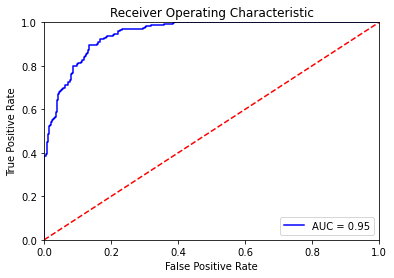

In [22]:
import sklearn.metrics as metrics
probs = model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
 
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [23]:
model1 = GaussianNB(priors=[0.1, 0.9])

In [24]:
model1.fit(X_train,y_train)

GaussianNB(priors=[0.1, 0.9])

In [25]:
model1.score(X_test,y_test)


0.7997032640949555

In [26]:
X_test[:10]

,variance,skewness,curtosis,entropy
1221,-1.8356,-6.75620,5.058500,-0.550440
645,2.9233,6.04640,-0.111680,-0.586650
1106,-0.1269,-1.15050,-0.951380,0.578430
283,0.3223,-0.89808,8.088300,0.692220
48,3.9102,6.06500,-2.453400,-0.682340
1119,-1.4375,-1.86240,4.026000,0.551270
793,-2.2860,-5.44840,5.803900,0.882310
1097,-2.5919,-1.05530,3.894900,0.777570
569,1.8238,-6.77480,8.387300,-0.541390
187,1.8314,6.36720,-0.036278,0.049554


In [27]:
y_test[:10]

1221    1
645     0
1106    1
283     0
48      0
1119    1
793     1
1097    1
569     0
187     0
Name: Class, dtype: int64

In [28]:
model1.predict(X_test[:10])

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

In [29]:
model1.predict_proba(X_test[:10])

array([[0.00171575, 0.99828425],
       [0.90038857, 0.09961143],
       [0.06794464, 0.93205536],
       [0.02169618, 0.97830382],
       [0.96167838, 0.03832162],
       [0.01020703, 0.98979297],
       [0.00127573, 0.99872427],
       [0.00385186, 0.99614814],
       [0.0274277 , 0.9725723 ],
       [0.73287584, 0.26712416]])

In [30]:
predicted1= model1.predict(X_test)
print(confusion_matrix(y_test,predicted1))

[[250 131]
 [  4 289]]


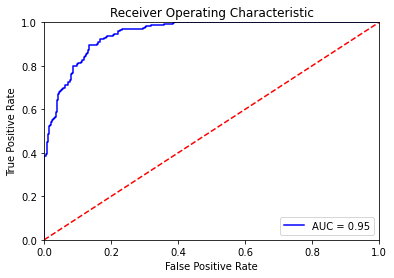

In [31]:
probs1 = model1.predict_proba(X_test)
preds1 = probs1[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds1)
roc_auc = metrics.auc(fpr, tpr)
 
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [32]:
print (probs1)

[[0.00171575 0.99828425]
 [0.90038857 0.09961143]
 [0.06794464 0.93205536]
 ...
 [0.2369604  0.7630396 ]
 [0.952811   0.047189  ]
 [0.06522485 0.93477515]]
